In [8]:
import pandas as pd
import matplotlib.pyplot as  plt
import numpy as np

In [9]:
df = pd.read_excel("height_weight.xlsx")
print(df)

    Weight  Height
0       45     120
1       58     135
2       48     123
3       60     145
4       70     160
5       78     162
6       80     163
7       90     175
8       95     182
9       78     170
10      82     176
11      95     182
12     105     175
13     100     183


In [7]:
!pip install matplotlib



Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/165.9 kB ? eta -:--:--
     ------- ------------------------------- 30.7/165.9 kB 1.4 MB/s eta 0:00:01
     ------------- ----------------------- 61.4/165.9 kB 825.8 kB/s eta 0:00:01
     ---------------------------- --------- 122.9/165.9 kB 1.0 MB/s eta 0:00:01
     -------------------------------------  163.8/165.9 kB 1.2 MB/s eta 0:00:01
     -------------------------------------  163.8/165.9 kB 1.2 MB/s eta 0:00:01
     ------------------------------------ 165.9/165.9 kB 832.5 kB/s eta 0:00:00
  Using cached pillow-10.4.0-cp312-cp312-win_amd64.whl.metadata (9.3 kB)
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/8.0 MB 2.6 MB/s eta 0:00:03
    --------------------------------------- 0.2/8.0 MB 2.6 MB/s eta 0:00:03
    --------------------------------------- 0.2/8.0 MB 2.6 MB/s eta 0:00:03


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

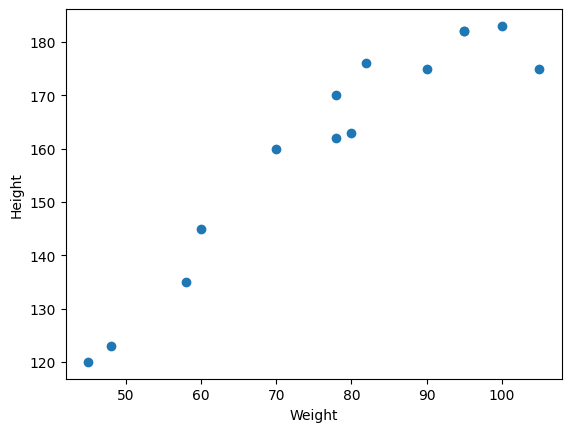

In [14]:
## scatter plot
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')

In [23]:
##Independent and dependent features


X = df[['Weight']]   ##independent feature should be a dataframe or a 2-D array
type(X)
X

,Weight
0,45
1,58
2,48
3,60
4,70
5,78
6,80
7,90
8,95
9,78


In [25]:
## independent feature
y = df['Height']    ### it can be i series or 1D
y 

0     120
1     135
2     123
3     145
4     160
5     162
6     163
7     175
8     182
9     170
10    176
11    182
12    175
13    183
Name: Height, dtype: int64

In [26]:
## Train and Test split

!pip install scikit-learn


Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     -------------------------- ------------- 41.0/60.8 kB ? eta -:--:--
     -------------------------- ------------- 41.0/60.8 kB ? eta -:--:--
     -------------------------- ------------- 41.0/60.8 kB ? eta -:--:--
     -------------------------- ------------- 41.0/60.8 kB ? eta -:--:--
     -------------------------- ------------- 41.0/60.8 kB ? eta -:--:--
     -------------------------- ------------- 41.0/60.8 kB ? eta -:--:--
     -------------------------------- ----- 51.2/60.8 kB 163.8 kB/s eta 0:00:01
     -------------------------------- ----- 51.2/60.8 kB 163.8 kB/s eta 0:00:01
     -------------------------------------- 60.8/60.8 kB 154.0 kB/s eta 0:00:00
   ---------------------------------------- 0.0/10.9 MB ? eta -:--:--
    --------------------------


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [57]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25, random_state=42)

print('X_train : ') 
print(X_train) 
print('') 
print('X_test : ') 
print(X_test) 
print('') 
print('y_train : ') 
print(y_train.head()) 
print('') 
print('y_test : ') 
print(y_test.head())

X_train : 
    Weight
5       78
8       95
2       48
1       58
13     100
4       70
7       90
10      82
3       60
6       80

X_test : 
    Weight
9       78
11      95
0       45
12     105

y_train : 
5     162
8     182
2     123
1     135
13    183
Name: Height, dtype: int64

y_test : 
9     170
11    182
0     120
12    175
Name: Height, dtype: int64


In [59]:
## Standardization


from sklearn.preprocessing  import StandardScaler

In [60]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train

array([[ 0.11808533],
       [ 1.17463832],
       [-1.74641994],
       [-1.12491818],
       [ 1.4853892 ],
       [-0.37911607],
       [ 0.86388745],
       [ 0.36668604],
       [-1.00061783],
       [ 0.24238569]])

In [61]:
X_test = scaler.transform(X_test)
X_test

C:\Users\mayank1.vijay\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


array([[ 78.],
       [ 95.],
       [ 45.],
       [105.]])

In [68]:
## Machine model using linear regression

from sklearn.linear_model import LinearRegression
regression = LinearRegression(n_jobs=-1)


In [69]:
regression.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [71]:
print("Coefficient or slope:" ,regression.coef_)
print("Intercept:" ,regression.intercept_)

Coefficient or slope: [18.75443708]
Intercept: 160.4


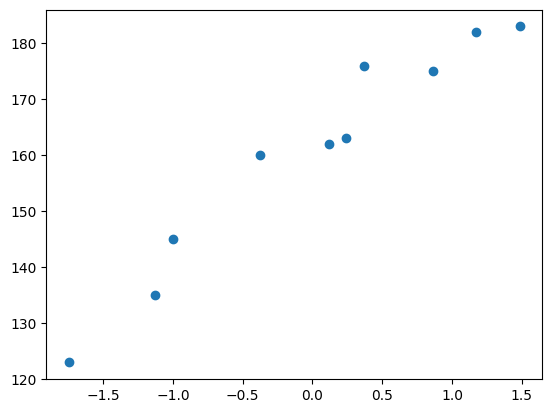

In [72]:
## plot training data plot best fit line

plt.scatter(X_train,y_train)

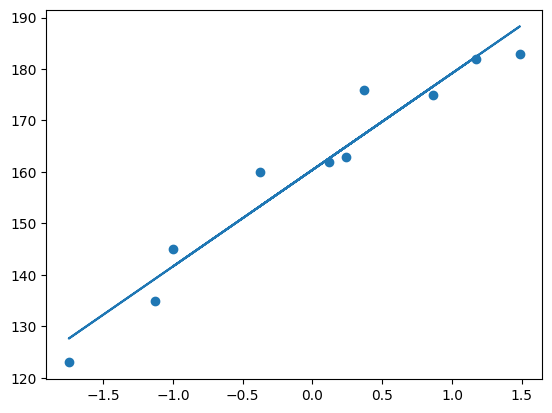

In [74]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train))

In [75]:
#Prediction for test data
y_pred =  regression.predict(X_test)


In [76]:
## Performance Matrix

from sklearn.metrics import mean_absolute_error,mean_squared_error

In [77]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)

print(mse)
print(mae)
print(rmse)

2453093.400214195
1513.0707945551953
1566.2354229853809


In [78]:
# R - Squre

from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
print(score)

-4093.033003382405


In [79]:
# Adjusted R2-square

In [81]:
# OLS Linear Regression

import statsmodels.api as sm

In [82]:
model = sm.OLS(y_train,X_train).fit()

In [84]:
prediction = model.predict(X_test)
print(prediction)

[1462.84609257 1781.67152301  843.94966879 1969.21589385]


In [85]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.013
Model:                            OLS   Adj. R-squared (uncentered):             -0.096
Method:                 Least Squares   F-statistic:                             0.1229
Date:                Sat, 27 Jul 2024   Prob (F-statistic):                       0.734
Time:                        20:38:26   Log-Likelihood:                         -64.970
No. Observations:                  10   AIC:                                      131.9
Df Residuals:                       9   BIC:                                      132.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Users\mayank1.vijay\AppData\Roaming\Python\Python312\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=10 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [86]:
# prediction for New Data

regression.predict(scaler.transform([[72]]))

array([1510.71947007])